# EDA - Clustering Feature - Region

* 머신 지역에 대해 분석할 예정!

## 라이브러리

In [1]:
import numpy as np
import pandas as pd
import warnings
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('max_rows', 500)
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)

## 데이터 로드

In [3]:
dtypes = {
        'MachineIdentifier':                                    'object',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [4]:
%%time
train = pd.read_csv('./data/train.csv', dtype=dtypes)
test = pd.read_csv('./data/test.csv', dtype=dtypes)

Wall time: 3min 18s


In [5]:
data = train.append(test)

In [52]:
data = data.reset_index(drop=True)

# 지역 관련 피처

- CountryIdentifier
- CityIdentifier
- OrganizationIdentifier
- GeoNameIdentifier
- LocaleEnglishNameIdentifier
- Census_OSInstallLanguageIdentifier
- Census_OSUILocaleIdentifier
- Wdft_RegionIdentifier
- Census_OEMNameIdentifier
- Census_OEMModelIdentifier

## CountryIdentifier
* 1부터 순서대로

In [6]:
len(data.CountryIdentifier.value_counts())

222

In [10]:
data.CountryIdentifier.value_counts(dropna=False)

43     854955
29     647634
141    626133
171    591078
93     520839
60     440351
201    437084
89     404519
207    402717
214    382567
66     375938
97     363656
158    335904
107    327198
44     320051
9      298986
51     289451
68     285818
203    280937
160    274348
41     273807
195    253827
205    248393
35     237857
142    228038
149    220002
155    207665
164    195229
59     192455
159    190219
173    176057
88     166503
169    158675
91     147650
12     146010
220    143456
101    142946
50     132804
80     130384
57     128298
18     122590
2      121208
95     118238
19     114061
84     109795
110    106692
21     101467
177     99672
11      91597
94      83660
178     82417
45      80613
211     80364
33      79498
39      79244
86      76175
122     75747
55      75637
180     74448
147     69333
53      68677
81      68392
170     67566
150     63843
118     62504
115     61843
56      61562
179     60930
100     57522
104     56045
90      55497
154   

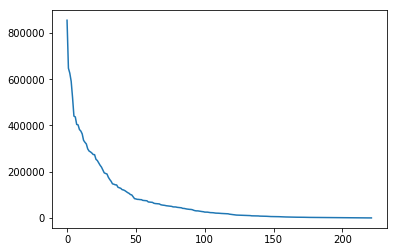

In [8]:
plt.plot(data.CountryIdentifier.value_counts().values)

## CityIdentifier
* 13만개

In [9]:
len(data.CityIdentifier.value_counts())

130523

In [10]:
data.CityIdentifier.value_counts().iloc[:10]

130775.0    162642
82373.0     152761
16668.0     145213
61668.0     135874
10222.0     135508
66202.0     128981
58607.0     121349
22656.0     121006
143782.0    116040
66953.0     114883
Name: CityIdentifier, dtype: int64

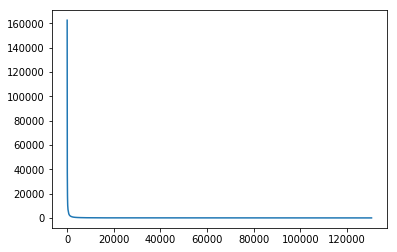

In [11]:
plt.plot(data.CityIdentifier.value_counts().values)

In [17]:
temp = data.groupby(['CountryIdentifier'])['CityIdentifier'].unique()
temp = temp.apply(lambda v: v.__len__()).to_frame()

In [18]:
data.groupby(['CountryIdentifier','CityIdentifier']).size()

CountryIdentifier  CityIdentifier
1                  4499.0             3509
                   5159.0                1
                   6037.0                6
                   23805.0              10
                   43325.0              45
                   43447.0               1
                   43989.0               3
                   44044.0              21
                   76768.0              69
                   91811.0               3
                   106312.0              5
                   130086.0             15
                   130315.0              6
                   136534.0              4
                   137630.0              1
2                  7.0                  56
                   584.0             25131
                   588.0                 2
                   978.0                12
                   1807.0             3255
                   1968.0             5825
                   1987.0             1736
                   1

## OrganizationIdentifier

In [19]:
col = 'OrganizationIdentifier'

In [22]:
train[col] = train[col].fillna(-1)

In [23]:
table = train.groupby(col)['HasDetections'].sum().to_frame()
table['cnt'] = train.groupby(col)['HasDetections'].count()
table['rate'] = np.around((table.HasDetections / table.cnt) * 100, 2)
table.sort_values('HasDetections', ascending=False)

,HasDetections,cnt,rate
OrganizationIdentifier,,,
27.0,2088092.0,4196457,49.76
-1.0,1369853.0,2751518,49.79
18.0,892153.0,1764175,50.57
48.0,33211.0,63845,52.02
50.0,27752.0,45502,60.99
11.0,10043.0,19436,51.67
37.0,9033.0,19398,46.57
49.0,6221.0,13627,45.65
46.0,5643.0,10974,51.42


In [26]:
temp = data.groupby(['OrganizationIdentifier', 'CountryIdentifier']).size().to_frame()

## GeoNameIdentifier

In [32]:
data.groupby(['GeoNameIdentifier', 'CountryIdentifier']).size()

GeoNameIdentifier  CountryIdentifier
1.0                2                       18
                   3                     1096
                   6                        3
                   8                        2
                   9                       20
                   11                       5
                   12                       5
                   15                       2
                   16                       1
                   17                       1
                   18                      26
                   19                      11
                   21                       2
                   27                       2
                   29                      90
                   32                       1
                   33                       2
                   34                       1
                   35                       9
                   36                       1
                   39                      

## LocaleEnglishNameIdentifier

In [33]:
data.groupby(['CountryIdentifier', 'LocaleEnglishNameIdentifier']).size()

CountryIdentifier  LocaleEnglishNameIdentifier
1                  -122                                1
                   -86                                 1
                   -85                                 2
                   -84                                53
                   -74                                17
                   -42                                18
                   -41                                 1
                   -40                                 1
                   -39                                 1
                   -38                                 2
                   -30                                 3
                   -29                                 4
                   -23                              2854
                   -22                               153
                   -21                                 3
                    3                                  1
                    8                    

## Census_OSInstallLanguageIdentifier

In [35]:
data.groupby(['CountryIdentifier', 'Census_OSInstallLanguageIdentifier']).size().loc[12]

Census_OSInstallLanguageIdentifier
1.0         15
2.0          1
3.0         11
4.0          9
5.0         94
6.0         15
7.0      24792
8.0     116362
9.0        214
10.0        47
11.0         1
12.0         4
13.0         1
14.0       154
15.0        10
17.0         7
18.0        54
19.0       124
20.0       554
21.0         2
23.0         8
24.0        26
25.0        28
26.0       127
27.0         6
28.0         1
29.0        51
30.0         5
33.0        12
34.0        10
35.0        20
36.0         3
37.0      2075
38.0        16
39.0       518
dtype: int64

## Platform

In [38]:
data.groupby(['ProductName', 'CountryIdentifier']).size()

ProductName    CountryIdentifier
mse            1                        21
               2                       635
               3                        37
               4                        23
               5                         1
               6                       267
               7                       185
               8                        77
               9                      2550
               10                        2
               11                      895
               12                     2222
               13                       31
               14                        2
               15                       98
               16                      213
               17                       54
               18                      112
               19                     1647
               20                        8
               21                     1131
               22                       45
               23    

## Census_OSUILocaleIdentifier

In [43]:
data.groupby(['LocaleEnglishNameIdentifier', 'Census_OSUILocaleIdentifier']).size()

LocaleEnglishNameIdentifier  Census_OSUILocaleIdentifier
-128                         30                                  4
                             31                                 39
                             35                                  1
                             72                                  1
                             125                                 2
                             148                                 1
-127                         26                                  2
                             30                                  6
                             31                                 49
                             34                                  1
                             49                                  1
                             78                                 13
                             119                                 1
                             125                              2481
     

In [39]:
len(data.Census_OSUILocaleIdentifier.unique())

151

In [ ]:
LocaleEnglishNameIdentifier

# Combined

In [43]:
new_cols = ['MachineIdentifier', 'HasDetections']

## Country + City

* 한 도시에 나라가 여러 개 존재하는 경우
* 나라당 도시의 갯수

### 한 도시에 나라가 여러개 존재하는 경우

In [6]:
city = data.groupby(['CityIdentifier', 'CountryIdentifier']).size().to_frame().reset_index()

In [9]:
city.rename(columns={0:'size'}, inplace=True)

In [13]:
dic = {}
for idx in tqdm_notebook(city.CityIdentifier.unique().tolist()):
    if city[city.CityIdentifier == idx].__len__() != 1:
        dic[idx] = city[city.CityIdentifier == idx].sort_values('size').iloc[-1].CountryIdentifier

In [19]:
data['CityIdx_CountryIdx_multi'] = 0

In [22]:
for city_idx, country_idx in tqdm_notebook(dic.items()):
    data.loc[data.CityIdentifier == city_idx, 'CountryIdentifier'] = country_idx
    data.loc[data.CityIdentifier == city_idx, 'CityIdx_CountryIdx_multi'] = 1

##### 임시저장

In [46]:
new_cols = new_cols + ['CountryIdentifier', 'CityIdx_CountryIdx_multi']

In [42]:
# data[new_cols].to_csv('./data_temp/new_feature_region.csv', index=False)

### 나라 별 도시의 개수
* log, min-max

In [115]:
# 나라별 도시의 개수
temp = data.groupby(['CountryIdentifier']).CityIdentifier.size()
map_minmax = np.around((temp - temp.min()) / (temp.max() - temp.min()) * 14).astype(int)
map_log = np.around(np.log(temp)).astype(int)

In [123]:
%%time
data['CityCnt_Per_Country_Minmax'] = data.CountryIdentifier
data['CityCnt_Per_Country_Log'] = data.CountryIdentifier
data.CityCnt_Per_Country_Minmax = data.CityCnt_Per_Country_Minmax.map(map_minmax)
data.CityCnt_Per_Country_Log = data.CityCnt_Per_Country_Log.map(map_log)

Wall time: 6.82 s


In [129]:
new_cols = new_cols + ['CityCnt_Per_Country_Minmax', 'CityCnt_Per_Country_Log']

In [131]:
data[new_cols].to_csv('./data_temp/new_feature_region.csv', index=False)

In [132]:
data[new_cols]

MemoryError: 